In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib; import pylab as plt;
plt.rc('text', usetex=True); plt.rc('font', family='serif');
%matplotlib inline

Use the netCDF4 package to load NetCDF files (*.nc). You may have to install it separately. Usage is very simple, just point nc.Dataset to the data file and tell it to read the file rather than write to it.

In [2]:
data = nc.Dataset("MOST.001.nc","r")

The structure of a NetCDF4 Dataset is essentially a dictionary, with a set of strings as keys, which when handed to Dataset.variables, returns array-like data.

In [3]:
print "Code\tDimensions ([t],[z],[lat],[lon])"
for i in data.variables:
    print i,'\t',data.variables[i][:].shape

Code	Dimensions ([t],[z],[lat],[lon])
lon 	(64,)
lat 	(32,)
lev 	(10,)
time 	(12,)
sg 	(12, 32, 64)
ta 	(12, 10, 32, 64)
ua 	(12, 10, 32, 64)
va 	(12, 10, 32, 64)
hus 	(12, 10, 32, 64)
ps 	(12, 32, 64)
wap 	(12, 10, 32, 64)
wa 	(12, 10, 32, 64)
zeta 	(12, 10, 32, 64)
ts 	(12, 32, 64)
mrso 	(12, 32, 64)
snd 	(12, 32, 64)
prl 	(12, 32, 64)
prc 	(12, 32, 64)
prsn 	(12, 32, 64)
hfss 	(12, 32, 64)
hfls 	(12, 32, 64)
stf 	(12, 10, 32, 64)
psi 	(12, 10, 32, 64)
psl 	(12, 32, 64)
pl 	(12, 32, 64)
d 	(12, 10, 32, 64)
zg 	(12, 10, 32, 64)
hur 	(12, 10, 32, 64)
mrro 	(12, 32, 64)
clw 	(12, 10, 32, 64)
cl 	(12, 10, 32, 64)
clt 	(12, 32, 64)
tas 	(12, 32, 64)
tsa 	(12, 32, 64)
lsm 	(12, 32, 64)
z0 	(12, 32, 64)
as 	(12, 32, 64)
rss 	(12, 32, 64)
rls 	(12, 32, 64)
rst 	(12, 32, 64)
rlut 	(12, 32, 64)
evap 	(12, 32, 64)
rsut 	(12, 32, 64)
ssru 	(12, 32, 64)
stru 	(12, 32, 64)
sic 	(12, 32, 64)
sit 	(12, 32, 64)
snm 	(12, 32, 64)
sndc 	(12, 32, 64)
prw 	(12, 32, 64)
glac 	(12, 32, 64)
spd 	(12, 10, 32

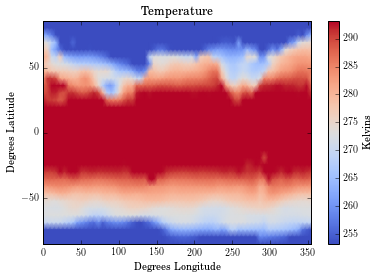

In [4]:
lts = data.variables['lat'][:]
lns = data.variables['lon'][:]
lons, lats = np.meshgrid(lns,lts)
t=plt.pcolormesh(lons,lats,data.variables['ts'][10,:],shading='Gouraud',cmap='coolwarm',vmin=253.15,vmax=293.15)
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title("Temperature")
plt.ylim(np.amin(lts),np.amax(lts))
plt.xlim(np.amin(lns),np.amax(lns))
c=plt.colorbar(t,label='Kelvins')


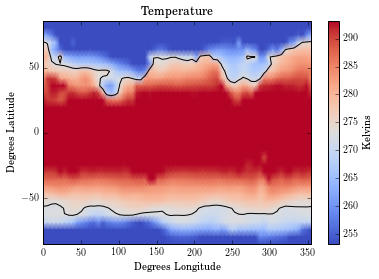

In [5]:

t=plt.pcolormesh(lons,lats,data.variables['ts'][10,:],shading='Gouraud',cmap='coolwarm',vmin=253.15,vmax=293.15)
plt.contour(lons,lats,data.variables['ts'][10,:],[273.15,],colors='k')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title("Temperature")
plt.ylim(np.amin(lts),np.amax(lts))
plt.xlim(np.amin(lns),np.amax(lns))
c=plt.colorbar(t,label='Kelvins')

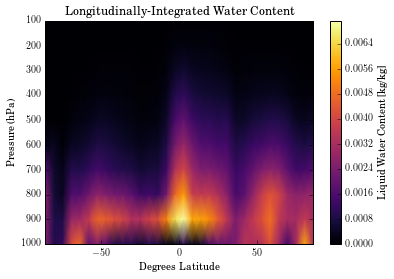

In [6]:
lvs = data.variables['lev'][:]
lats2,levs = np.meshgrid(lts,lvs)
w=plt.pcolormesh(lats2,levs,np.sum(data.variables['clw'][7,:],axis=2),shading='Gouraud',cmap='inferno')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Degrees Latitude')
plt.title("Longitudinally-Integrated Water Content")
plt.ylim(np.amin(lvs),np.amax(lvs))
plt.xlim(np.amin(lts),np.amax(lts))
c=plt.colorbar(w,label='Liquid Water Content [kg/kg]')
plt.gca().invert_yaxis()

It can be instructive to view the data with the proper scaling, noting that we're talking about a spherical planet. The additional Matplotlib Basemap package allows us to plot the data as a Mollweide projection. This package needs to be installed separately, on top of the existing matplotlib installation.

In [7]:
from mpl_toolkits.basemap import Basemap

We also need to wrap the data--our data doesn't include both 360 degrees longitude and 0 degrees longitude, but we need it for a full Mollweide projection. So we define two functions for wrapping 2D and 3D data.

In [8]:
def wrap2d(datd,vals):
    modf=np.zeros(datd.ndim,dtype=int)
    modf[-1]=1
    dd=np.zeros(datd.shape+modf)
    dd[:,0:datd.shape[-1]]=datd
    dd[:,datd.shape[-1]]=vals
    return dd

def wrap3d(datd,vals):
    modf=np.zeros(datd.ndim,dtype=int)
    modf[-1]=1
    dd=np.zeros(datd.shape+modf)
    dd[:,:,0:datd.shape[-1]]=datd
    dd[:,:,datd.shape[-1]]=vals
    return dd

In [9]:
latsw=wrap2d(lats,lats[:,0])
lonsw=wrap2d(lons,360.0)
dataw=wrap2d(data.variables['ts'][6,:],data.variables['ts'][6,:,0])
print np.amax(dataw-273.15)

44.5119262695


In [10]:
names=['January','February','March','April','May','June','July','August','September','October','November','December']

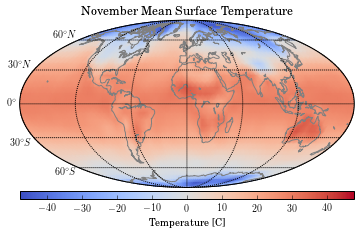

In [11]:
month=10
latsw=wrap2d(lats,lats[:,0])
lonsw=wrap2d(lons,360.0)
dataw=wrap2d(data.variables['ts'][month,:],data.variables['ts'][month,:,0])

maxv=np.amax(abs(dataw-273.15))
minv=-maxv

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,dataw-273.15,shading='Gouraud',cmap='coolwarm',latlon=True,vmin=minv,vmax=maxv)

m.drawcoastlines(color='gray')
pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
mr=m.drawmeridians(np.arange(-180,180.,60.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Temperature [C]")
plt.title(names[month]+" Mean Surface Temperature")

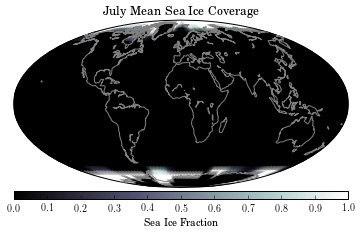

In [12]:
month=6
latsw=wrap2d(lats,lats[:,0])
lonsw=wrap2d(lons,360.0)
dataw=wrap2d(data.variables['sic'][month,:],data.variables['sic'][month,:,0])
lsm=wrap2d(data.variables['lsm'][month,:],data.variables['lsm'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,dataw,shading='Gouraud',cmap='bone',latlon=True)
m.drawcoastlines(color='gray')
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Sea Ice Fraction")
plt.title(names[month]+" Mean Sea Ice Coverage")

In [13]:
month=6

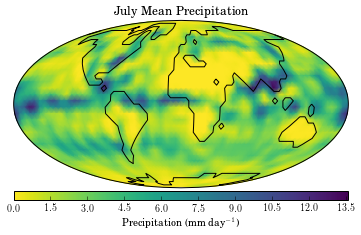

In [14]:
latsw=wrap2d(lats,lats[:,0])
lonsw=wrap2d(lons,360.0)
dataw=wrap2d(data.variables['pr'][month,:],data.variables['pr'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,(dataw)*8.64e7,shading='Gouraud',cmap='viridis_r',latlon=True)#,vmin=-40,vmax=40)
continent = m.contour(lonsw,latsw,lsm,[0.5,],colors='k',latlon=True,zorder=3)
#m.drawcoastlines()
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Precipitation (mm day$^{-1}$)")
plt.title(names[month]+" Mean Precipitation")

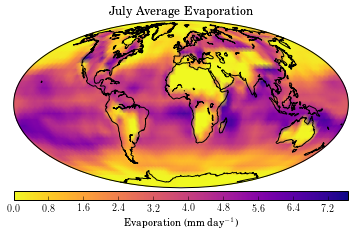

In [15]:

dataw=wrap2d(data.variables['evap'][month,:],data.variables['evap'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,-dataw*8.64e7,shading='Gouraud',cmap='plasma_r',latlon=True)
#continent = m.contour(lonsw,latsw,lsm,[0.5,],colors='lightgray',latlon=True,zorder=3)
m.drawcoastlines()
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Evaporation (mm day$^{-1}$)")
plt.title(names[month]+" Average Evaporation")

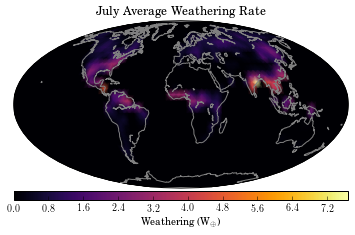

In [16]:
dataw=wrap2d(data.variables['lwth'][month,:],data.variables['lwth'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,dataw,shading='Gouraud',cmap='inferno',latlon=True)
#continent = m.contour(lonsw,latsw,lsm,[0.5,],colors='lightgray',latlon=True,zorder=3)
m.drawcoastlines(color='gray')
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Weathering (W$_\oplus$)")
plt.title(names[month]+" Average Weathering Rate")

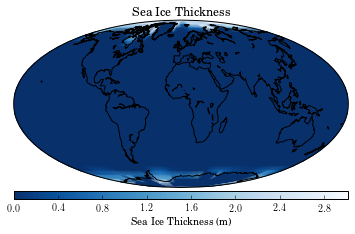

In [17]:
dataw=wrap2d(data.variables['sit'][month,:],data.variables['sit'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,dataw,shading='Gouraud',cmap='Blues_r',latlon=True)
m.drawcoastlines()
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Sea Ice Thickness (m)")
plt.title("Sea Ice Thickness")

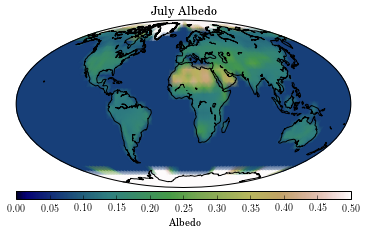

In [18]:

dataw=wrap2d(data.variables['as'][month,:],data.variables['as'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c')
tm = m.pcolormesh(lonsw,latsw,dataw,shading='Gouraud',cmap='gist_earth',latlon=True,vmin=0,vmax=0.5)
#continent = m.contour(lonsw,latsw,lsm,[0.5,],colors='lightgray',latlon=True,zorder=3)
m.drawcoastlines()
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Albedo")
plt.title(names[month]+" Albedo")

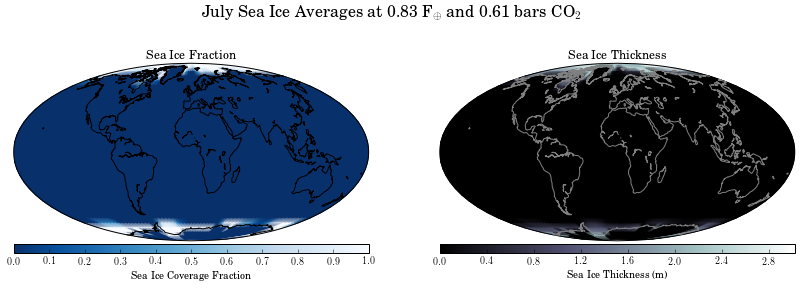

In [19]:
f,axarr = plt.subplots(1,2,figsize=(14,4.5))
f.suptitle(names[month]+" Sea Ice Averages at 0.83 F$_\oplus$ and 0.61 bars CO$_2$",fontsize=16)

datac=wrap2d(data.variables['sic'][month,:],data.variables['sic'][month,:,0])

m = Basemap(projection='moll',lon_0=0,resolution='c',ax=axarr[0])
tm = m.pcolormesh(lonsw,latsw,datac,shading='Gouraud',cmap='Blues_r',latlon=True)
m.drawcoastlines()
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb = m.colorbar(tm,"bottom", size="5%", pad="2%",label="Sea Ice Coverage Fraction")
axarr[0].set_title("Sea Ice Fraction")

dataw=wrap2d(data.variables['sit'][month,:],data.variables['sit'][month,:,0])

m2 = Basemap(projection='moll',lon_0=0,resolution='c',ax=axarr[1])
tm2 = m2.pcolormesh(lonsw,latsw,dataw,shading='Gouraud',cmap='bone',latlon=True)
m2.drawcoastlines(color='gray')
#pr=m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,1])
#mr=m.drawmeridians(np.arange(-180,180.,90.))
cb2 = m2.colorbar(tm2,"bottom", size="5%", pad="2%",label="Sea Ice Thickness (m)")
axarr[1].set_title("Sea Ice Thickness")

In [20]:
data.variables['lev'][:]

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.])

In [21]:
pressure = data.variables['lev'][:]
meantemp = np.mean(data.variables['ta'][month,:],axis=(1,2))

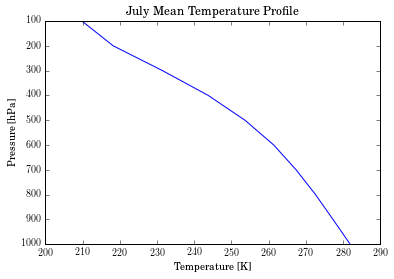

In [22]:
plt.plot(meantemp,pressure)
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [hPa]')
plt.gca().invert_yaxis()
plt.title(names[month]+' Mean Temperature Profile')

In [23]:
localtemp = data.variables['ta'][month,:,12,48]

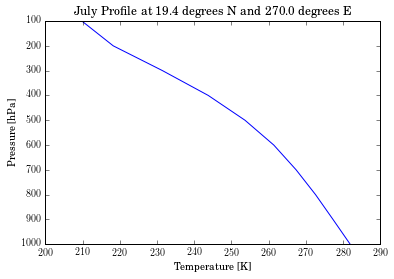

In [24]:
plt.plot(meantemp,pressure)
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [hPa]')
plt.gca().invert_yaxis()
plt.title(names[month]+' Profile at %3.1f degrees N'%data.variables['lat'][12]+' and %3.1f degrees E'%data.variables['lon'][48])